In [138]:
#import libraries
code=""
import pandas as pd
import seaborn as sns
import numpy as np
from fpdf import FPDF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize']=(10,6) 

# Importing analyzed
df = pd.read_csv(r"C:\Users\OTAS\Downloads\QVI_data.csv")


print (df)
""

        Unnamed: 0        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0                0  2018-10-17          1            1000       1         5   
1                1  2019-05-14          1            1307     348        66   
2                2  2019-05-20          1            1343     383        61   
3                3  2018-08-17          2            2373     974        69   
4                4  2018-08-18          2            2426    1038       108   
...            ...         ...        ...             ...     ...       ...   
246737      246737  2019-03-09        272          272319  270088        89   
246738      246738  2018-08-13        272          272358  270154        74   
246739      246739  2018-11-06        272          272379  270187        51   
246740      246740  2018-12-27        272          272379  270188        42   
246741      246741  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  P

''

In [139]:
#Total sales per LIFESTAGE AND PREMIUM_CUSTOMERS

Sales_summary = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(Sales_summary)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   76542.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG FAMILIES       Mainstream   86338.25
17        

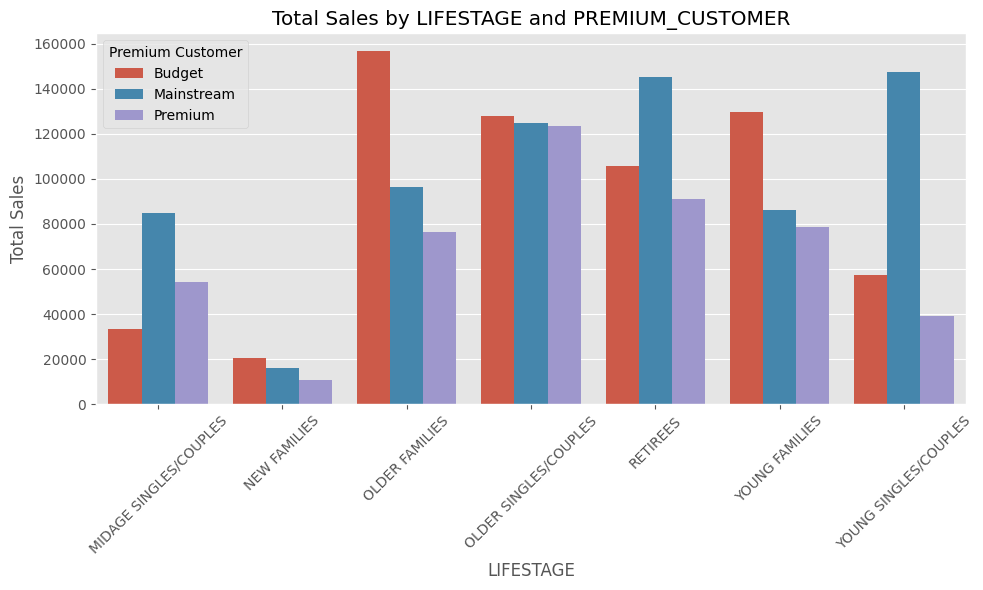

In [140]:
# Plotting the total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

# Adding labels and title
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')

# Show the plot
plt.tight_layout()
plt.show()

In [141]:
#No of consumers in each segment
# Counting the number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_count = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count').sort_values('Customer_Count', ascending=False)
print(customer_count)

                 LIFESTAGE PREMIUM_CUSTOMER  Customer_Count
6           OLDER FAMILIES           Budget           21514
13                RETIREES       Mainstream           19970
19   YOUNG SINGLES/COUPLES       Mainstream           19544
15          YOUNG FAMILIES           Budget           17763
9    OLDER SINGLES/COUPLES           Budget           17172
10   OLDER SINGLES/COUPLES       Mainstream           17061
11   OLDER SINGLES/COUPLES          Premium           16560
12                RETIREES           Budget           14225
7           OLDER FAMILIES       Mainstream           13241
14                RETIREES          Premium           12236
16          YOUNG FAMILIES       Mainstream           11947
1   MIDAGE SINGLES/COUPLES       Mainstream           11095
17          YOUNG FAMILIES          Premium           10784
8           OLDER FAMILIES          Premium           10405
18   YOUNG SINGLES/COUPLES           Budget            8573
2   MIDAGE SINGLES/COUPLES          Prem

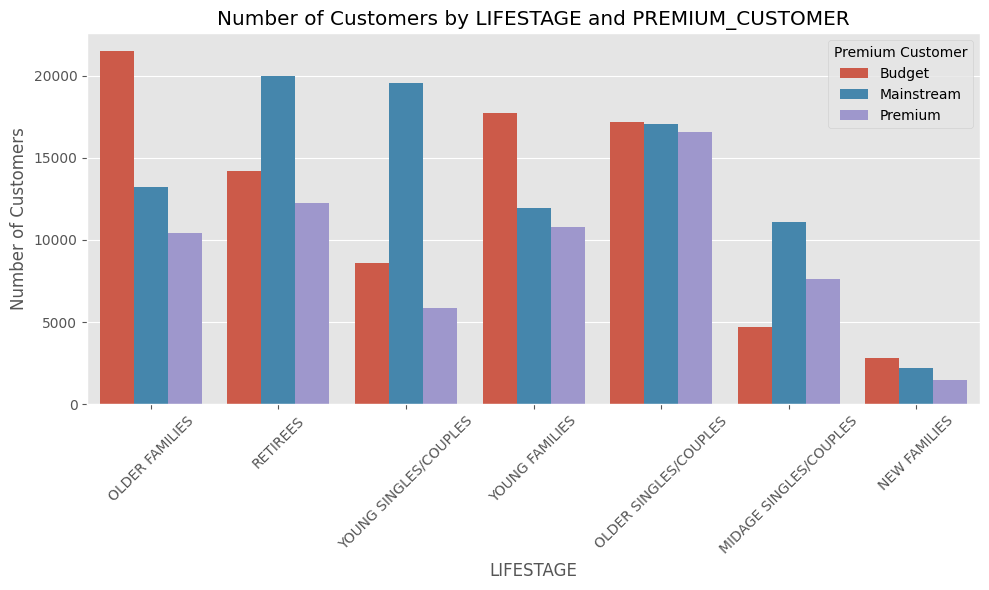

In [142]:
# Plotting the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_count, x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER')

# Adding labels and title
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')

# Show the plot
plt.tight_layout()
plt.show()

In [143]:
# Calculating the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index(name='Average_Units')

print(avg_units)

                 LIFESTAGE PREMIUM_CUSTOMER  Average_Units
0   MIDAGE SINGLES/COUPLES           Budget       1.893626
1   MIDAGE SINGLES/COUPLES       Mainstream       1.911942
2   MIDAGE SINGLES/COUPLES          Premium       1.891750
3             NEW FAMILIES           Budget       1.855878
4             NEW FAMILIES       Mainstream       1.858124
5             NEW FAMILIES          Premium       1.860887
6           OLDER FAMILIES           Budget       1.945384
7           OLDER FAMILIES       Mainstream       1.948795
8           OLDER FAMILIES          Premium       1.983566
9    OLDER SINGLES/COUPLES           Budget       1.914920
10   OLDER SINGLES/COUPLES       Mainstream       1.911201
11   OLDER SINGLES/COUPLES          Premium       1.913949
12                RETIREES           Budget       1.893286
13                RETIREES       Mainstream       1.886680
14                RETIREES          Premium       1.901438
15          YOUNG FAMILIES           Budget       1.9412

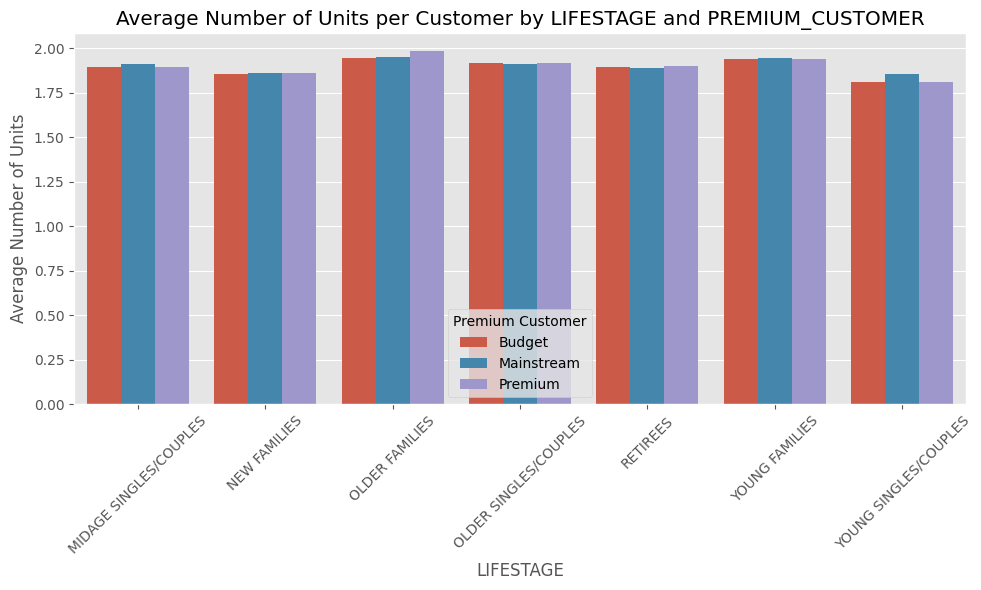

In [144]:
# Plotting the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='Average_Units', hue='PREMIUM_CUSTOMER')

# Adding labels and title
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Number of Units')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')

# Show the plot
plt.tight_layout()
plt.show()

In [145]:
# Calculating the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index(name='Average_Price_Per_Unit')

print(avg_price_per_unit)


                 LIFESTAGE PREMIUM_CUSTOMER  Average_Price_Per_Unit
0   MIDAGE SINGLES/COUPLES           Budget                7.108442
1   MIDAGE SINGLES/COUPLES       Mainstream                7.637156
2   MIDAGE SINGLES/COUPLES          Premium                7.152371
3             NEW FAMILIES           Budget                7.297256
4             NEW FAMILIES       Mainstream                7.313364
5             NEW FAMILIES          Premium                7.231720
6           OLDER FAMILIES           Budget                7.291241
7           OLDER FAMILIES       Mainstream                7.281440
8           OLDER FAMILIES          Premium                7.356329
9    OLDER SINGLES/COUPLES           Budget                7.444305
10   OLDER SINGLES/COUPLES       Mainstream                7.306049
11   OLDER SINGLES/COUPLES          Premium                7.459997
12                RETIREES           Budget                7.445786
13                RETIREES       Mainstream     

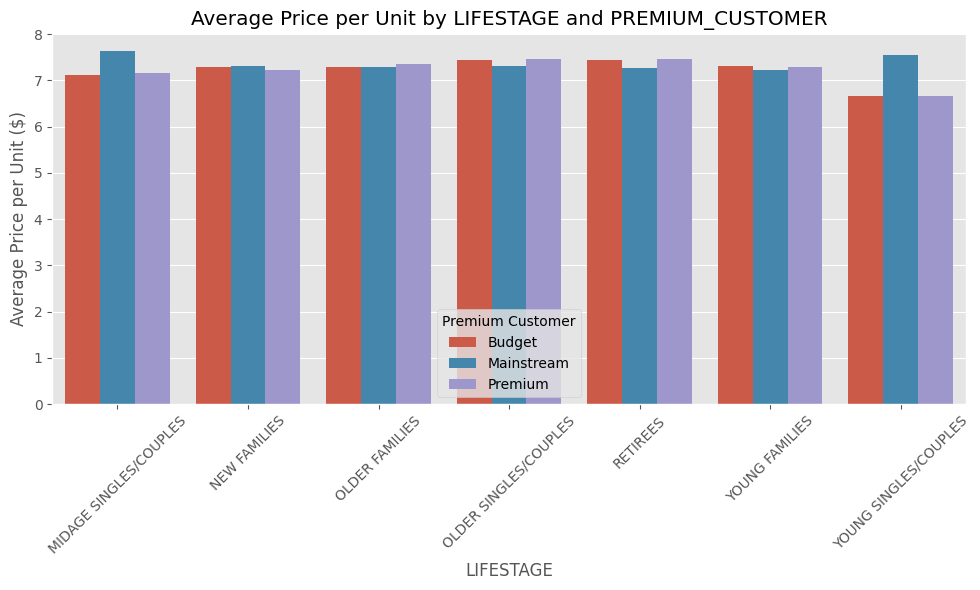

In [146]:
# Plotting the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='Average_Price_Per_Unit', hue='PREMIUM_CUSTOMER')

# Adding labels and title
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit ($)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')

# Show the plot
plt.tight_layout()
plt.show()

In [147]:
#performing t-test
import scipy.stats as stats

# Filter data for Mainstream (young and mid-age singles/couples) vs Premium (young and mid-age singles/couples)
mainstream = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES']
premium = df[df['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES']
budget= df[df['PREMIUM_CUSTOMER']== 'budget']['TOT_SALES']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(mainstream, premium)

# Output the results of the t-test
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    result = "ARE significantly higher"
else:
    result = "ARE NOT significantly higher"
print(result)

T-test results: t-statistic = 4.193881678316468, p-value = 2.7436843974965848e-05
ARE significantly higher


In [ ]:
# Filter data for Mainstream, Young Singles/Couples segment (assumed 'Young Adult' in this example)
df_mainstream_young = df[(df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'YOUNG')]

# Calculate the average pack size for Mainstream, Young Singles/Couples
avg_pack_size_mainstream_young = df_mainstream_young['PACK_SIZE'].mean()

# Calculate the average pack size for the rest of the population
df_others = df[~((df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'YOUNG'))]
avg_pack_size_others = df_others['PACK_SIZE'].mean()

# Print results
print(f"Average Pack Size for Mainstream - Young Singles/Couples: {avg_pack_size_mainstream_young:.2f} units")
print(f"Average Pack Size for Other Customer Segments: {avg_pack_size_others:.2f} units")

# Interpretation
if avg_pack_size_mainstream_young > avg_pack_size_others:
    print("\nMainstream - Young Singles/Couples tend to buy larger pack sizes compared to the rest of the population.")
else:
    print("\nMainstream - Young Singles/Couples do not tend to buy larger pack sizes compared to the rest of the population.")



Average Pack Size for Mainstream - Young Singles/Couples: nan units
Average Pack Size for Other Customer Segments: 175.59 units

Mainstream - Young Singles/Couples do not tend to buy larger pack sizes compared to the rest of the population.


In [154]:
# Initialize PDF
code= ""
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set font for the PDF
pdf.set_font("Arial", size=12)

# Add title to the PDF
pdf.cell(200, 10, txt="QVI_data analysis", ln=True, align='C')
# Add the Python code
pdf.multi_cell(0, 10, txt=code)

# Make sure to replace the file path with your desired location
save_path = r'C:\Users\OTAS\Downloads\QVI_data analysis.pdf' 

# Output the PDF to the specified path
pdf.output(save_path)

print(f"PDF has been generated and saved to: {save_path}")

""

PDF has been generated and saved to: C:\Users\OTAS\Downloads\QVI_data analysis.pdf


''